In [54]:
import os
import pandas as pd
from itertools import islice

SELECTED_ITEM = ['WI', 'NO', 'EO', 'SO']
SELECTED_TL = 'W_TL'

SAVED_DIR = 'output/2high'
assemble_data = []
for file_name in os.listdir(SAVED_DIR):
    file_path = os.path.join(SAVED_DIR, file_name)
    data_df = pd.read_csv(file_path)
    change_record = data_df.loc[data_df['change'] == 1]
    for index in islice(change_record.index, 2, None, 2):
        decision_row = data_df.iloc[index]
        single_batch_data = []
        tl_status = None
        for i in range(8):
            if i == 0:
                tl_status = data_df[SELECTED_TL].iloc[index]
            prev_index = index - i
            rename_column = {item: item + str(i) for item in SELECTED_ITEM}
            rename_df = data_df[SELECTED_ITEM].iloc[prev_index].rename(rename_column)
            single_batch_data.append(rename_df)
        # print(single_batch_data)
        concat_data = pd.concat(single_batch_data)
        concat_data[SELECTED_TL] = int(tl_status)
        assemble_data.append(concat_data)


In [55]:
import numpy as np
X = ['WI' + str(i) for i in range(8)]
Y = 'W_TL'

data_df = pd.DataFrame(assemble_data)
true_df = data_df.loc[data_df[Y] == 1][X]
false_df = data_df.loc[data_df[Y] == 0][X]
data_df = data_df[X]

avg_true = true_df.apply(np.average, axis=0)
avg_false = false_df.apply(np.average, axis=0)

dev = data_df.apply(np.std, axis=0)
true_size = true_df.shape[0]
false_size = false_df.shape[0]
total_size = data_df.shape[0]

In [56]:
coefficient = (avg_true - avg_false) / dev * np.sqrt(true_size * false_size / (total_size ** 2))
print(coefficient.to_dict())

{'WI0': 0.20911346266114175, 'WI1': 0.17886745255032505, 'WI2': 0.157843725734764, 'WI3': 0.15060014184343107, 'WI4': 0.11936188287724596, 'WI5': 0.10865898794564516, 'WI6': 0.0988352926678496, 'WI7': 0.09096216370081349}


Text(0, 0.5, 'relevant coefficient')

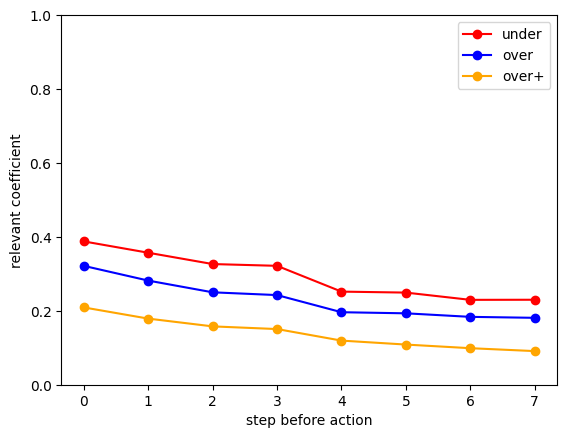

In [57]:
UNDERSATURATED_RESULT = {'WI0': 0.38776264424417084, 'WI1': 0.3570994393112539, 'WI2': 0.32647600185655784, 'WI3': 0.3216891091447352, 'WI4': 0.2519086550324557, 'WI5': 0.24926531018115974, 'WI6': 0.22963377405564644, 'WI7': 0.2299113229953777}
OVERSATURATED_RESULT = {'WI0': 0.32155739276216944, 'WI1': 0.28174862479262935, 'WI2': 0.250015476662902, 'WI3': 0.24253975636054578, 'WI4': 0.19617821608301048, 'WI5': 0.1931779277769893, 'WI6': 0.18361750717229366, 'WI7': 0.1810047693705956}
PLUS_OVERSATURATED_RESULT = {'WI0': 0.20911346266114175, 'WI1': 0.17886745255032505, 'WI2': 0.157843725734764, 'WI3': 0.15060014184343107, 'WI4': 0.11936188287724596, 'WI5': 0.10865898794564516, 'WI6': 0.0988352926678496, 'WI7': 0.09096216370081349}

x_label = list(UNDERSATURATED_RESULT.keys())
under_y = list(UNDERSATURATED_RESULT.values())
over_y = list(OVERSATURATED_RESULT.values())
plus_over_y = list(PLUS_OVERSATURATED_RESULT.values())
x = list(range(len(UNDERSATURATED_RESULT)))

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x, under_y, color='red', marker='o', label='under')
ax.plot(x, over_y, color='blue', marker='o', label='over')
ax.plot(x, plus_over_y, color='orange', marker='o', label='over+')
ax.set_ylim(0, 1)
ax.legend()
ax.set_xlabel('step before action')
ax.set_ylabel('relevant coefficient')